## Churn Problem for Bank Company

### Created & Presented by Suraj Mishra

### Problem Statement

* The aim is to estimate whether a bank's customers leave the bank or not.

* The event that defines the customer abandonment is the closing of the customer's bank account.

### Data Set Story:

* It consists of 10000 observations and 13 variables.
* Independent variables contain information about customers.
* Dependent variable refers to customer abandonment.

### Variables:

* RowNumber — corresponds to the record (row) number and has no effect on the output.
    
* CustomerId — contains random values and has no effect on customer leaving the bank.
    
* Surname — the surname of a customer has no impact on their decision to leave the bank.
    
* CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely
  to leave the bank.
    
* Geography — a customer’s location can affect their decision to leave the bank.
    
* Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank.
    
* Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
    
* Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients
  are more loyal and less likely to leave a bank.

* Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are
  less likely to leave the bank compared to those with lower balances.
    
* NumOfProducts — refers to the number of products that a customer has purchased through the bank.
    
* HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with
   a credit card are less likely to leave the bank.
    
* IsActiveMember — active customers are less likely to leave the bank.
    
* EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to 
   those with higher salaries.
    
* Exited— whether or not the customer left the bank.

    
* Acknowledgements -

  As we know, it is much more expensive to sign in a new client than keeping an existing one.
    
  It is advantageous for banks to know what leads a client towards the decision to leave the company.
    
  Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.
   

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the Data**

In [2]:
churn = pd.read_csv('Churn_Modelling.csv', index_col= 0, header= 0)

**Data Exploration**

In [3]:
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.shape

(10000, 13)

In [5]:
churn.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Data Statistics**

In [6]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


**Checking for Missing Value**

In [7]:
churn.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Data Visualization

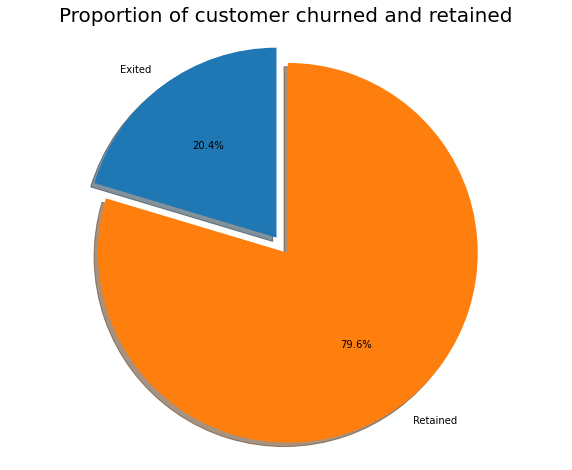

In [8]:
labels = 'Exited', 'Retained'
sizes = [churn.Exited[churn['Exited']==1].count(), churn.Exited[churn['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

* The above Pie Chart shows that proportion of Exited & Retained Customers, from this we can understand that the Exited 
  Customer is approx. 20% and Retained customer is approx. 80 %

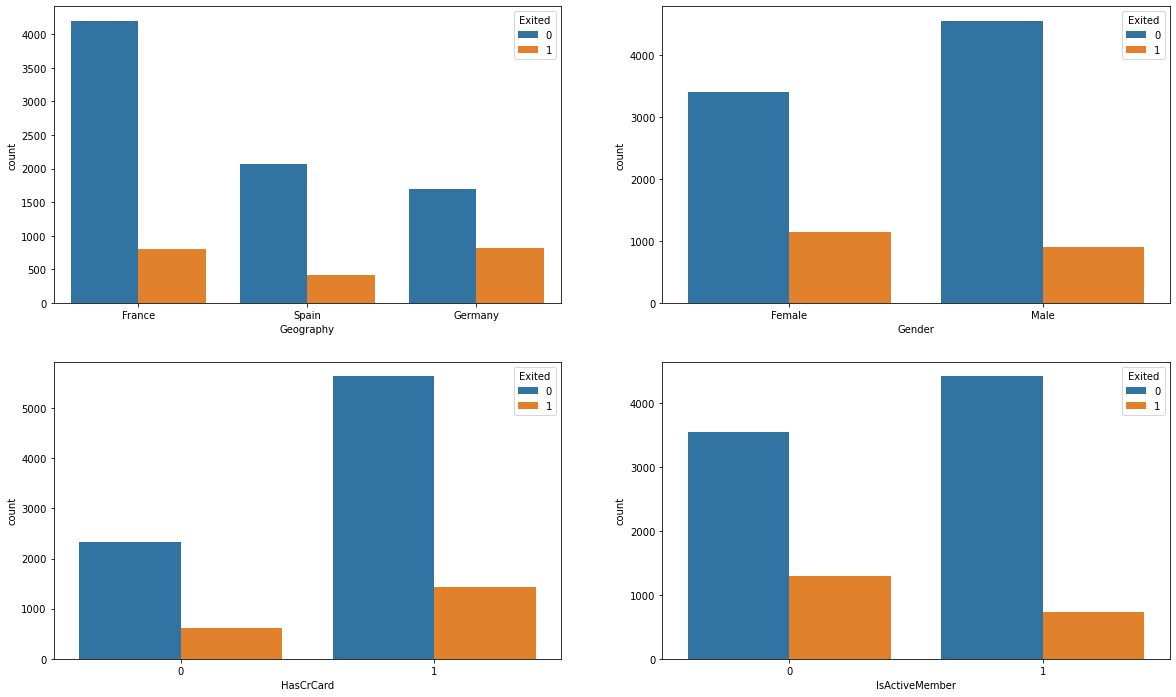

In [9]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = churn, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = churn, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = churn, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = churn, ax=axarr[1][1])
plt.show()

* Majority of the data is from persons from France. However, the proportion of churned customers is with inversely
  related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer 
  service resources allocated) in the areas where it has fewer clients.
* The proportion of female customers churning is also greater than that of male customers
* Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the 
  customers have credit cards could prove this to be just a coincidence.
* Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive
  mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers
  as this will definately have a positive impact on the customer churn.

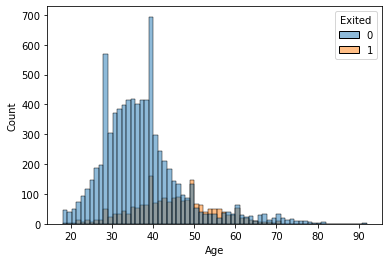

In [10]:
sns.histplot(data=churn, x = 'Age', hue= 'Exited')
plt.show()

From the above histplot we can understand:
* Customers between the ages of 40 to 55 were more likely to quit the bank.

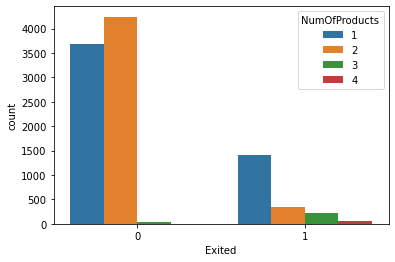

In [11]:
sns.countplot(churn.Exited, hue=churn.NumOfProducts)
plt.show()

From the above countplot we can understand:

* Most customers who using products 3 and 4 stopped working with the bank.

* In fact, all customers using product number 4 were gone.

### Pre-processing the Data

In [12]:
# Droping the unnecessary column
churn.drop(['Surname','CustomerId'], inplace= True, axis = 1)

In [13]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


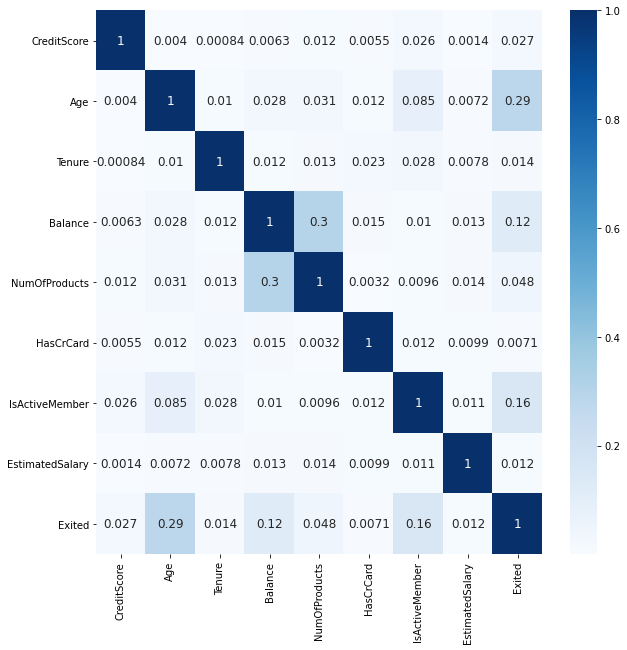

In [14]:
# Now, let's see correlation graph by using Heat Map
correlation = churn.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap = 'Blues', annot_kws={"size": 12})
plt.show()

In [15]:
# List of correlation scores:
corrs_results = churn.corrwith(churn["Exited"]).abs().nlargest(24)
corrs_results

Exited             1.000000
Age                0.285323
IsActiveMember     0.156128
Balance            0.118533
NumOfProducts      0.047820
CreditScore        0.027094
Tenure             0.014001
EstimatedSalary    0.012097
HasCrCard          0.007138
dtype: float64

**Applying LabelEnoding to convert categorical variable into numerical**

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
colname = []
for x in churn.columns:
    if churn[x].dtype == 'object':
        colname.append(x)
for x in colname:
    churn[x] = le.fit_transform(churn[x])

In [17]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Create X & Y

In [18]:
X = churn.values[:,:-1]
Y = churn.values[:,-1]
Y = Y.astype(int)

In [19]:
X.shape

(10000, 10)

In [20]:
Y.shape

(10000,)

### Treating Imbalance Data

In [23]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, Y_train_SMOTE = smt.fit_sample(X,Y)

In [24]:
pd.DataFrame(Y_train_SMOTE).value_counts()

0    7963
1    7963
dtype: int64

### Spliting Data into training & testing

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_train_SMOTE,Y_train_SMOTE, test_size = 0.3, random_state = 10)

### Scaling Data 

In [26]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
print(X_train)

[[-1.86333363  1.62989447  1.0597953  ...  0.69788954  1.15426574
   1.69131681]
 [-0.85466127 -1.01378492  1.0597953  ...  0.69788954 -0.98163615
  -0.34622332]
 [ 1.14075579 -1.01378492 -1.08387995 ...  0.69788954 -0.98163615
   0.6831307 ]
 ...
 [ 0.31881519  0.62920683  0.24836963 ... -0.75563713 -0.17315286
  -0.10444064]
 [ 0.6693111  -1.01378492 -1.08387995 ...  0.69788954 -0.98163615
  -0.75459741]
 [ 0.26364939  0.30805477  1.0597953  ...  0.69788954 -0.98163615
  -1.72235808]]


### Training the Model - Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 1 0 ... 0 0 1]


### Evaluating the model and getting prediction

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print('Classification Report: ')

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print('Accuracy on test data: ', acc)

[[1740  655]
 [ 671 1712]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      2395
           1       0.72      0.72      0.72      2383

    accuracy                           0.72      4778
   macro avg       0.72      0.72      0.72      4778
weighted avg       0.72      0.72      0.72      4778

Accuracy on test data:  0.7224780242779406


### Tuning the model using Cross Validation

In [29]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=5,random_state=10)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.69237668 0.71300448 0.71390135 0.70121131 0.70704352]
0.7055074668002502


In [30]:
#model tuning

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

### Evaluating the model and getting prediction

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[1736  659]
 [ 672 1711]]
Classification report: 
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2395
           1       0.72      0.72      0.72      2383

    accuracy                           0.72      4778
   macro avg       0.72      0.72      0.72      4778
weighted avg       0.72      0.72      0.72      4778

Accuracy of the model:  0.7214315613227291


### Training the Model - Decision Tree

In [32]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[0 1 1 ... 0 0 0]


### Evaluating the model and getting prediction

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[2078  317]
 [ 318 2065]]
Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2395
           1       0.87      0.87      0.87      2383

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778

Accuracy of the model:  0.867099204688154


### Pruning the Model

In [34]:
# Pruning the Decision tree
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="entropy",random_state=10, min_samples_leaf= 10, max_depth = 10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

[0 1 1 ... 0 0 0]


### Evaluating the model and getting prediction

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[2218  177]
 [ 394 1989]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2395
           1       0.92      0.83      0.87      2383

    accuracy                           0.88      4778
   macro avg       0.88      0.88      0.88      4778
weighted avg       0.88      0.88      0.88      4778

Accuracy of the model:  0.8804939305148598


### Training the model - Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 200, random_state = 10, max_depth= 5, min_samples_leaf= 5)
rf. fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
print(Y_pred)

[0 1 1 ... 0 0 0]


### Evaluating the model and getting prediction

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print('Classification Report: ')

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print('Accuracy on test data: ', acc)

[[2198  197]
 [ 370 2013]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2395
           1       0.91      0.84      0.88      2383

    accuracy                           0.88      4778
   macro avg       0.88      0.88      0.88      4778
weighted avg       0.88      0.88      0.88      4778

Accuracy on test data:  0.8813311008790289


### Tuning the Model

In [38]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
params = {"n_estimators":range(0,200,50),"criterion":["entropy","gini"] , "max_depth": range(0,40,20), "min_samples_split":range(0,20,10)}
Grid = GridSearchCV(rf , param_grid=params,return_train_score=True,scoring="f1_macro",cv=5)

In [39]:
Grid.fit(X_train , Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [40]:
print(Grid.best_params_)
print('\n')
print(Grid.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}


0.9069095503929473


In [85]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators= 100, max_depth= 20, min_samples_split=10,
                           criterion='entropy')
rf1. fit(X_train,Y_train)
Y_pred = rf1.predict(X_test)
print(Y_pred)

[0 1 1 ... 0 0 0]


### Evaluating the model and getting prediction

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[2272  123]
 [ 317 2066]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2395
           1       0.94      0.87      0.90      2383

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778

Accuracy of the model:  0.9079112599413981


In [43]:
import itertools
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)


from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.rcParams.update({'font.size': 16})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, color="blue")
    plt.yticks(tick_marks, classes, color="blue")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2277  118]
 [ 322 2061]]
True Negatives:  2277
False Positives:  118
False Negatives:  322
True Positives:  2061


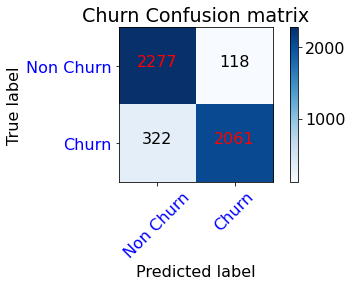

In [44]:
cfm = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cfm, classes=['Non Churn','Churn'],
                      title='Churn Confusion matrix')


tn, fp, fn, tp = cfm.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

### Training the Model - KNN

In [45]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
metric='minkowski')
#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

### Evaluating the model and getting prediction

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[1734  661]
 [ 373 2010]]
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      2395
           1       0.75      0.84      0.80      2383

    accuracy                           0.78      4778
   macro avg       0.79      0.78      0.78      4778
weighted avg       0.79      0.78      0.78      4778

Accuracy of the model:  0.7835914608622855


### Tuning the Model

In [47]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,31):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="minkowski")
    model_KNN.fit(X_train, Y_train)
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is  0.8817496860611135 for K-Value: 1
Accuracy is  0.8472164085391377 for K-Value: 2
Accuracy is  0.857262452909167 for K-Value: 3
Accuracy is  0.8411469233989117 for K-Value: 4
Accuracy is  0.8455420678107995 for K-Value: 5
Accuracy is  0.8344495604855588 for K-Value: 6
Accuracy is  0.8317287568020092 for K-Value: 7
Accuracy is  0.8279614901632483 for K-Value: 8
Accuracy is  0.8292172457095018 for K-Value: 9
Accuracy is  0.8218920050230222 for K-Value: 10
Accuracy is  0.8200083717036417 for K-Value: 11
Accuracy is  0.8191712013394726 for K-Value: 12
Accuracy is  0.8174968606111344 for K-Value: 13
Accuracy is  0.818752616157388 for K-Value: 14
Accuracy is  0.8181247383842613 for K-Value: 15
Accuracy is  0.817915445793219 for K-Value: 16
Accuracy is  0.8191712013394726 for K-Value: 17
Accuracy is  0.8177061532021767 for K-Value: 18
Accuracy is  0.8177061532021767 for K-Value: 19
Accuracy is  0.8185433235663457 for K-Value: 20
Accuracy is  0.8189619087484303 for K-Value: 21
Accu

In [48]:
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

1 : 0.8817496860611135


In [49]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN1=KNeighborsClassifier(n_neighbors=1,
metric='minkowski')
#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN1.fit(X_train,Y_train)

Y_pred=model_KNN1.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

### Evaluating the model and getting prediction

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[2044  351]
 [ 214 2169]]
Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2395
           1       0.86      0.91      0.88      2383

    accuracy                           0.88      4778
   macro avg       0.88      0.88      0.88      4778
weighted avg       0.88      0.88      0.88      4778

Accuracy of the model:  0.8817496860611135


### Training the model - SVC

In [51]:
from sklearn.svm import SVC
svc_model = SVC(kernel = 'rbf', C = 1, gamma = 0.1)
svc_model.fit(X_train, Y_train)
Y_pred = svc_model.predict(X_test)
#print(list(Y_pred))

### Evaluating the model and getting prediction

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[2172  223]
 [ 437 1946]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2395
           1       0.90      0.82      0.86      2383

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778

Accuracy of the model:  0.8618668899120971


### Tuning the model

In [53]:
from sklearn import svm

svc_model = svm.SVC(kernel="rbf")

parameter_space = {
#'kernel': ["linear","rbf","poly","sigmoid"],
'gamma': [0.1,0.01,0.001],
'C': [1,5,8,10,20]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svc_model, parameter_space, n_jobs=-1, cv=5)

In [54]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 8, 10, 20], 'gamma': [0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'C': 20, 'gamma': 0.1}


In [56]:
from sklearn.svm import SVC
svc_model1 = SVC(kernel = 'rbf', C = 20, gamma = 0.1)
svc_model1.fit(X_train, Y_train)
Y_pred = svc_model1.predict(X_test)
#print(list(Y_pred))

### Evaluating the model and getting prediction

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[2172  223]
 [ 391 1992]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2395
           1       0.90      0.84      0.87      2383

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778

Accuracy of the model:  0.8714943491000419


### Training the model - AdaBoost_Classifier

In [58]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator= None,n_estimators=200,random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

### Evaluating the model and getting prediction

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[2247  148]
 [ 327 2056]]
Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2395
           1       0.93      0.86      0.90      2383

    accuracy                           0.90      4778
   macro avg       0.90      0.90      0.90      4778
weighted avg       0.90      0.90      0.90      4778

Accuracy of the model:  0.9005860192549183


### Training the Model - Gradient_Boosting_Classifier

In [60]:
#predicting using the Gradient_Boosting_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=300,
random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

### Evaluating the model and getting prediction

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[2271  124]
 [ 317 2066]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2395
           1       0.94      0.87      0.90      2383

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778

Accuracy of the model:  0.9077019673503558


### Training the model - XGB_Classifier

In [62]:
from xgboost import XGBClassifier

model_XGB=XGBClassifier(n_estimators = 150,random_state=10)

#fit the model on the data and predict the values
model_XGB.fit(X_train,Y_train)

Y_pred=model_XGB.predict(X_test)

[14:21:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Evaluating the model and getting prediction

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[2259  136]
 [ 309 2074]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2395
           1       0.94      0.87      0.90      2383

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778

Accuracy of the model:  0.9068647969861867


### Training the model - Extra_Trees_Classifier

In [64]:
#predicting using the Extra_Trees_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_EXT=ExtraTreesClassifier(n_estimators=150, random_state=10, criterion = 'gini')

#fit the model on the data and predict the values
model_EXT.fit(X_train,Y_train)

Y_pred=model_EXT.predict(X_test)

### Evaluating the model and getting prediction

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[2269  126]
 [ 295 2088]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2395
           1       0.94      0.88      0.91      2383

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778

Accuracy of the model:  0.9118878191712013


### Feature Importance

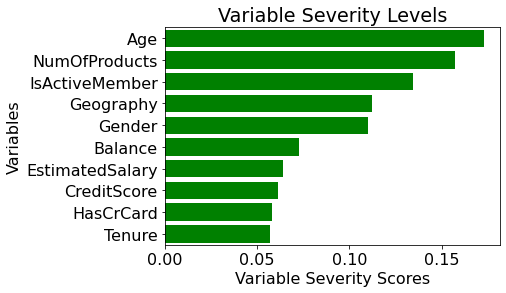

In [66]:
feature_index = churn.iloc[:,:-1]
dependent_variable_name = 'Exited'
feature_importance = pd.Series(model_EXT.feature_importances_, 
                               index=feature_index.columns).sort_values(ascending=False)
sns.barplot(x = feature_importance, y = feature_importance.index, color='g', saturation=1)
plt.xlabel('Variable Severity Scores')
plt.ylabel('Variables')
plt.title('Variable Severity Levels')
plt.show()

### Features Selection

In [67]:
x = churn.values[:,:7]
y = churn.values[:,-1]
y = Y.astype(int)

In [68]:
# Balancing the Data
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
x_train_SMOTE, y_train_SMOTE = smt.fit_sample(x,y)

In [69]:
pd.DataFrame(y_train_SMOTE).value_counts()

0    7963
1    7963
dtype: int64

In [70]:
# Splitting data into training & testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train_SMOTE,y_train_SMOTE, test_size = 0.3, random_state = 10)

In [71]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
print(x_train)

[[-1.84133723  1.63056592  1.048582   ... -1.4743986  -1.31947019
   0.81066303]
 [-0.84884828 -1.01214792  1.048582   ...  1.84028679  0.7920266
   0.81066303]
 [ 1.11455379 -1.01214792 -1.08690816 ...  1.10369003 -1.31947019
   0.81066303]
 ...
 [-0.58847568  0.63024376  1.048582   ...  1.56146959 -1.31947019
   1.20858827]
 [ 0.65067308 -1.01214792 -1.08690816 ... -1.10610023  0.49884769
  -0.82716979]
 [ 0.25151991  0.309209    1.048582   ...  1.84028679  0.35736076
  -0.82716979]]


### Training the model with feature importance - Extra_Trees_Classifier

In [72]:
#predicting using the Extra_Trees_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_EXT_with_FI=ExtraTreesClassifier(n_estimators=150, random_state=10, criterion = 'entropy')

#fit the model on the data and predict the values
model_EXT_with_FI.fit(x_train,y_train)

y_pred=model_EXT_with_FI.predict(x_test)

### Evaluating the model and getting prediction

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[2214  181]
 [ 334 2049]]
Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2395
           1       0.92      0.86      0.89      2383

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778

Accuracy of the model:  0.8922143156132273


## Ensemble model Technique

### Training the model - Voting Classifier

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('log', model1))
model2 = DecisionTreeClassifier(criterion="entropy",random_state=10, min_samples_leaf= 10, max_depth= 10)
estimators.append(('cart', model2))
model3 = SVC(kernel="rbf", C=20,gamma=0.1)
estimators.append(('svm', model3))
model4 = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
estimators.append(('knn', model4))
model5 = RandomForestClassifier(n_estimators= 50, random_state = 10, max_depth= 20, min_samples_split=10,
                           criterion='gini')
estimators.append(('rf', model5))


# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
print(Y_pred)

[0 1 1 ... 0 0 0]


### Evaluating the model and getting prediction

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)

print("Accuracy of the model: ",acc)

[[2227  168]
 [ 290 2093]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2395
           1       0.93      0.88      0.90      2383

    accuracy                           0.90      4778
   macro avg       0.91      0.90      0.90      4778
weighted avg       0.91      0.90      0.90      4778

Accuracy of the model:  0.9041439933026371


In [82]:
def data_training(X_train, X_test, Y_train, Y_test):

    models = []
    models.append(('LOGR',classifier))
    models.append(('KNN',model_KNN1))
    models.append(('CART',model_DecisionTree))
    models.append(('RF',rf1))
    models.append(('SVC',svc_model1))
    models.append(('GBM',model_GradientBoosting))
    models.append(('XGBoost',model_XGB))
    models.append(('ExtraTreesClassifier',model_EXT))
    models.append(('AdaBoostClassifier',model_AdaBoost))
    models.append(('VotingClassifier',ensemble))
    df_result = pd.DataFrame(columns=["model","accuracy_score","scale_method","weighted_avg_precision","weighted_avg_recall",
                                     "weighted_avg_f1-score"])
    index = 0
    for name,model in models:
        model.fit(X_train,Y_train)
        Y_pred = model.predict(X_test)
        score = accuracy_score(Y_test,Y_pred)
        class_report = classification_report(Y_test,Y_pred,digits=2,output_dict=True)
        weighted_avg = class_report['weighted avg']
    
        df_result.at[index,['model','accuracy_score','scale_method',"weighted_avg_precision","weighted_avg_recall",
                                     "weighted_avg_f1-score"]] = [name,score,"NA",weighted_avg['precision'],
                                                                  weighted_avg['recall'],weighted_avg['f1-score']]
        index += 1
    return df_result.sort_values("accuracy_score",ascending=False)

In [83]:
training_result = data_training(X_train, X_test, Y_train, Y_test)
training_result

[14:27:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,accuracy_score,scale_method,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1-score
7,ExtraTreesClassifier,0.911888,NA,0.913944,0.911888,0.91177
3,RF,0.909586,NA,0.912576,0.909586,0.909411
5,GBM,0.907702,NA,0.910363,0.907702,0.907542
6,XGBoost,0.906865,NA,0.908993,0.906865,0.906734
9,VotingClassifier,0.904144,NA,0.905189,0.904144,0.904075
8,AdaBoostClassifier,0.900586,NA,0.90283,0.900586,0.900437
1,KNN,0.88175,NA,0.883026,0.88175,0.881661
2,CART,0.880494,NA,0.883633,0.880494,0.880233
4,SVC,0.871494,NA,0.873318,0.871494,0.871324
0,LOGR,0.722478,NA,0.722483,0.722478,0.722473


## Conclusion

* Our aim in this project was to develop a churn prediction model using machine learning algorithms.

* There were 10000 rows in the data set and there were no missing values. and the dataset consisted of 13 variables.

* The following conclusions came from the analysis on the features:

* Most customers who using products 3 and 4 stopped working with the bank.

* In fact, all customers using product number 4 were gone.

* Customers between the ages of 40 to 55 were more likely to quit the bank.

* Those who had a credit score below 450 had high abandonment rates.

* Predictions were made with a total of 10 classification models.The highest head was taken with ExtraTreesClassifier method.

* With 6 features importance model gives us 89% accuracy where as with 10 features model gives us 91% accuracy, means that 
  60 % features we will get 89% accuracy.
  
* In all above 10 classification models the best model is Extra_Tree_Classifier which gives us 91% accuracy  
    
* Accuracy and cross validation scores were calculated for each model and results were displayed.

## Thank You